# Sentiment Analysis of IMDB Dataset

In [5]:
# import nltk 
# nltk.download('stopwords')
# !pip install wordcloud

In [6]:
#Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('IMDB Dataset.csv', encoding='latin1')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [8]:
df.shape

(25526, 2)

In [9]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [10]:
df.duplicated().sum()

109

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(25417, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25417 entries, 0 to 25525
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25417 non-null  object
 1   sentiment  25417 non-null  object
dtypes: object(2)
memory usage: 595.7+ KB


In [14]:
df['sentiment'].value_counts()

positive    12741
negative    12676
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiment Distribution')

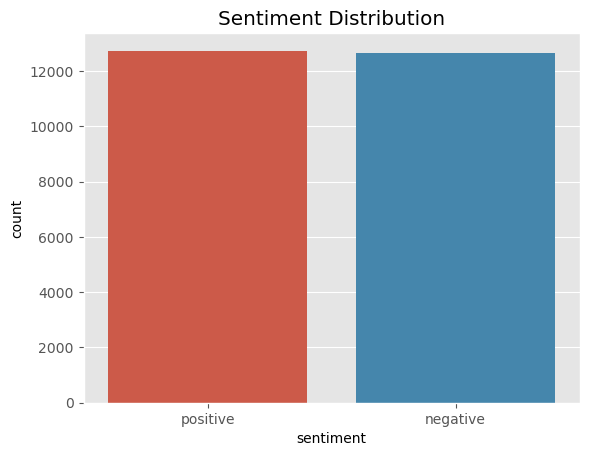

In [15]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")

In [16]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [17]:
df['word count'] = df['review'].apply(no_of_words)

In [18]:
df.head()

review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

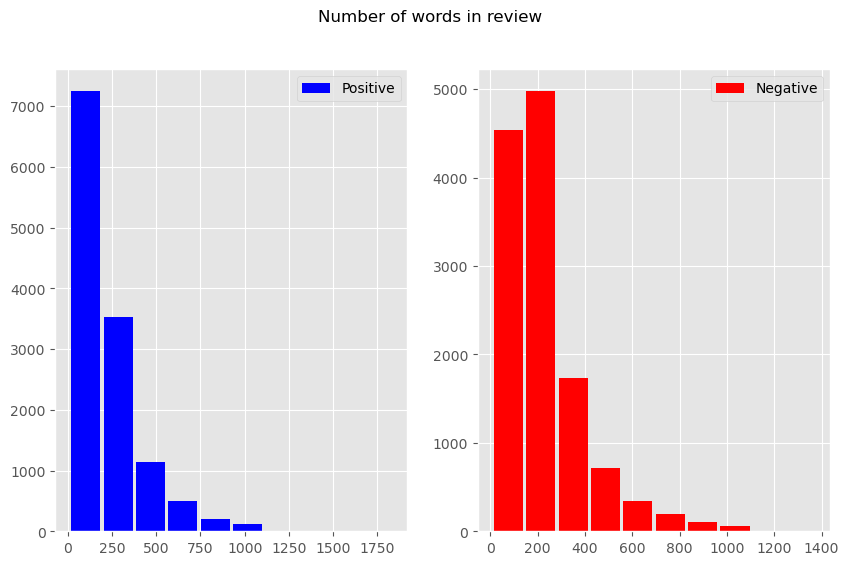

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

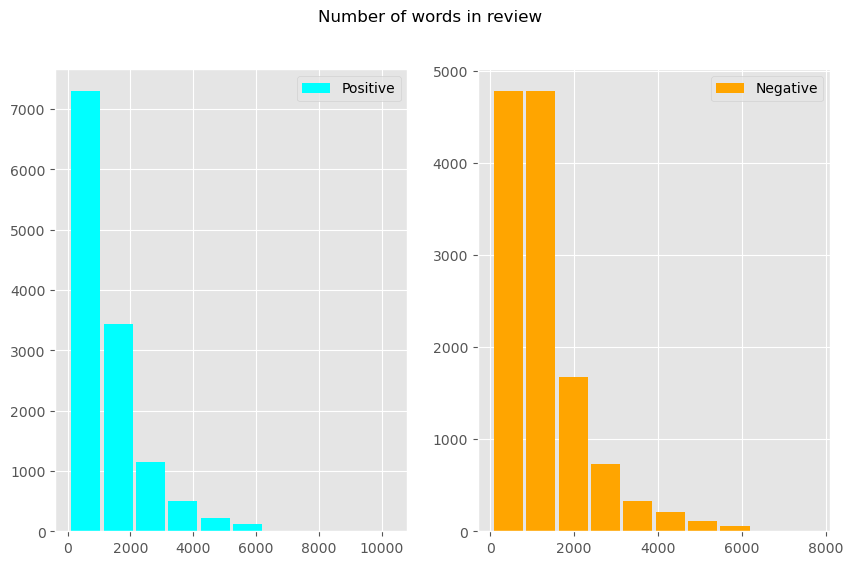

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='cyan', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='orange', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [21]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)
df.head()

review  sentiment  word count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          2         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230

# Data Processing

In [22]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [23]:
# import nltk
# nltk.download('punkt')

In [24]:
df.review = df['review'].apply(data_processing)

In [25]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [26]:
df.review = df['review'].apply(lambda x: stemming(x))

In [27]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
3  basically theres family little boy jake thinks...          2          67
4  petter matteis love time money visually stunni...          1         125

In [28]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58

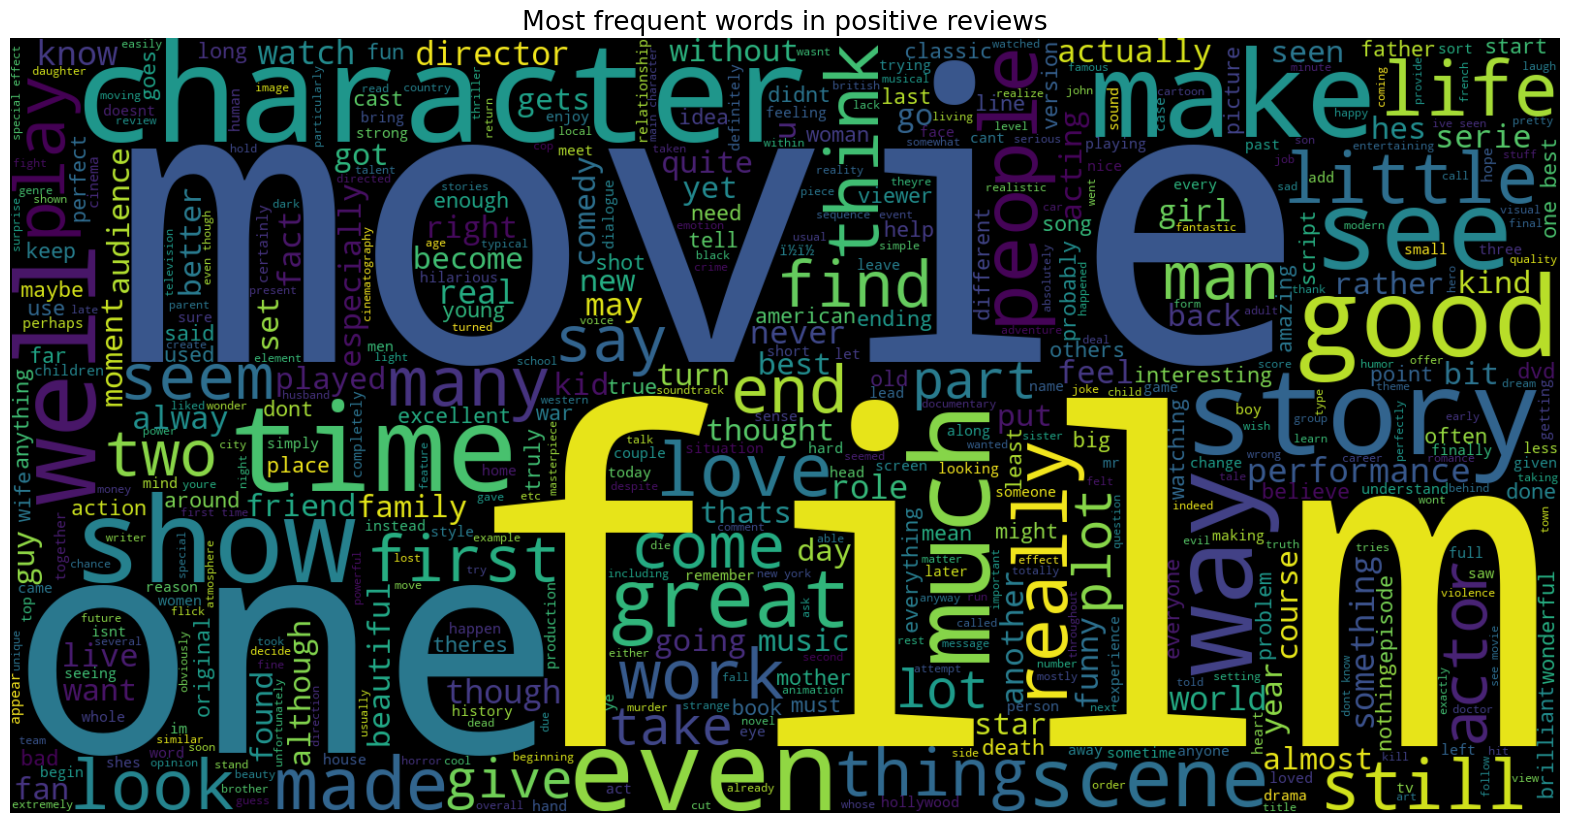

In [29]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [30]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 20228),
 ('movie', 18404),
 ('one', 13111),
 ('like', 8768),
 ('good', 7353),
 ('story', 6321),
 ('great', 6297),
 ('see', 6017),
 ('time', 5957),
 ('well', 5650),
 ('really', 5407),
 ('would', 5365),
 ('also', 5321),
 ('even', 4679),
 ('much', 4652)]

In [31]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0   film  20228
1  movie  18404
2    one  13111
3   like   8768
4   good   7353

In [32]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [33]:
neg_reviews =  df[df.sentiment == 2]
neg_reviews.head()

review  sentiment  word count
3   basically theres family little boy jake thinks...          2          67
7   show amazing fresh innovative idea 70s first a...          2          83
8   encouraged positive comments film looking forw...          2          64
10  phil alien one quirky films humour based aroun...          2          51
11  saw movie 12 came recall scariest scene big bi...          2          84

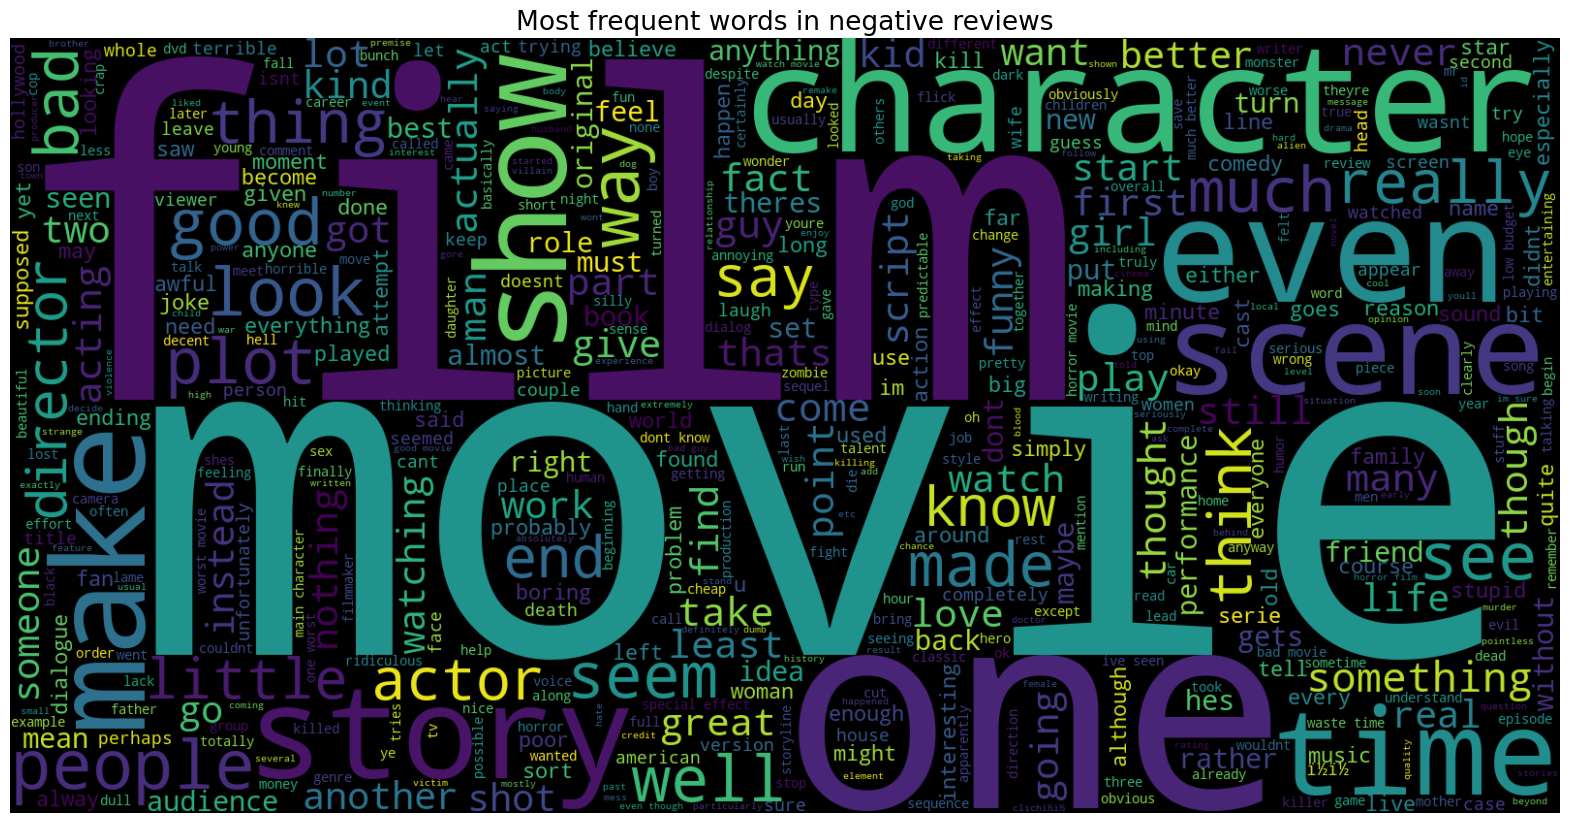

In [34]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [35]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 24161),
 ('film', 17695),
 ('one', 12422),
 ('like', 11061),
 ('even', 7678),
 ('good', 7249),
 ('bad', 7112),
 ('would', 6995),
 ('really', 6095),
 ('time', 5849),
 ('see', 5348),
 ('get', 5174),
 ('dont', 5097),
 ('much', 4996),
 ('story', 4897)]

In [36]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0  movie  24161
1   film  17695
2    one  12422
3   like  11061
4   even   7678

In [37]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(df['review'],df['sentiment'],test_size=0.2)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Assuming reviews_train and sent_train are defined
# reviews_train: list of text reviews
# sent_train: list of sentiment labels

# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1, 2))

# Create a LogisticRegression model
model = LogisticRegression()

# Combine the vectorizer and the model into a pipeline
pipeline = make_pipeline(vectorizer, model)

# Fit the pipeline to the training data
pipeline.fit(reviews_train, sent_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1, 2))),
                ('logisticregression', LogisticRegression())])

In [41]:
# Train the model
pipeline.fit(reviews_train, sent_train)

# Make predictions
predictions = pipeline.predict(reviews_test)

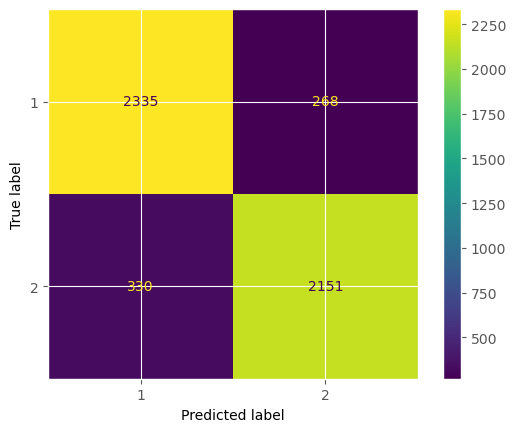

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(sent_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8824


In [44]:
import pickle as pk

In [45]:
pk.dump(model,open('model.pkl','wb'))